<a href="https://colab.research.google.com/github/jeriko13/skripsi/blob/main/Curah_Hujan_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files

# Mengupload file dari lokal ke Colab
uploaded = files.upload()

# Memindahkan file yang telah diupload ke direktori Colab
for filename in uploaded.keys():
  !mv "{filename}" /content/


Saving df_rainfall.csv to df_rainfall.csv
mv: 'df_rainfall.csv' and '/content/df_rainfall.csv' are the same file


In [2]:
# read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("df_rainfall.csv" ,na_values=0,header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])
#df
# Memilih hanya 50 baris data pertama
df_50 = df.iloc[:50]

# Menampilkan 50 baris data pertama

df.head(50)

,Date,dewpoint,temperature,rainfall
0,01/01/2017,"297,691","303,931","0,01"
1,02/01/2017,"297,72","303,498","0,012"
2,03/01/2017,"297,736","302,315","0,02"
3,04/01/2017,"297,772","302,133","0,016"
4,05/01/2017,"297,78","302,281","0,014"
5,06/01/2017,"297,758","302,529","0,002"
6,07/01/2017,"297,504","303,647","0,003"
7,08/01/2017,"297,401","303,459","0,003"
8,09/01/2017,"297,697","301,818","0,018"
9,10/01/2017,"297,777","302,498","0,012"


In [3]:
#menampilkan daftar kolom pada DataFrame.
df.columns

Index(['Date', 'dewpoint', 'temperature', 'rainfall'], dtype='object')

In [4]:
#Untuk menghapus baris yang memiliki nilai NaN di semua kolom
df.dropna(how='all', inplace=True)


In [5]:
#mengetahui jumlah baris data menampilkan baris terakhir dari DataFrame atau Series.
df.tail

<bound method NDFrame.tail of           Date dewpoint temperature rainfall
0   01/01/2017  297,691     303,931     0,01
1   02/01/2017   297,72     303,498    0,012
2   03/01/2017  297,736     302,315     0,02
3   04/01/2017  297,772     302,133    0,016
4   05/01/2017   297,78     302,281    0,014
5   06/01/2017  297,758     302,529    0,002
6   07/01/2017  297,504     303,647    0,003
7   08/01/2017  297,401     303,459    0,003
8   09/01/2017  297,697     301,818    0,018
9   10/01/2017  297,777     302,498    0,012
10  11/01/2017  297,851     302,931    0,005
11  12/01/2017  297,885      303,57     0,02
12  13/01/2017  297,665     302,621    0,004
13  14/01/2017  297,003     301,931    0,021
14  15/01/2017  297,069     302,465    0,001
15  16/01/2017  297,258     302,138    0,008
16  17/01/2017  297,159     302,415    0,006
17  18/01/2017  297,181     302,668    0,006
18  19/01/2017  297,275     303,205    0,012
19  20/01/2017  297,228     303,056    0,007
20  21/01/2017  297,389  

In [6]:
#mengubah , menjadi .
df['dewpoint'] = df['dewpoint'].str.replace(',', '.').astype(float)
df['temperature'] = df['temperature'].str.replace(',', '.').astype(float)
df['rainfall'] = df['rainfall'].str.replace(',', '.').astype(float)

In [7]:

#mengubah tipe data ke numerik
pd.to_numeric(df['dewpoint'], errors='coerce')
pd.to_numeric(df['temperature'], errors='coerce')
pd.to_numeric(df['rainfall'], errors='coerce')


0     0.010
1     0.012
2     0.020
3     0.016
4     0.014
5     0.002
6     0.003
7     0.003
8     0.018
9     0.012
10    0.005
11    0.020
12    0.004
13    0.021
14    0.001
15    0.008
16    0.006
17    0.006
18    0.012
19    0.007
20    0.012
21    0.018
22    0.011
23    0.015
24    0.012
25    0.002
26    0.007
27    0.006
28    0.012
29    0.002
30    0.010
31    0.016
32    0.005
33    0.006
34    0.014
35    0.002
36    0.005
37    0.006
38    0.007
39    0.015
40    0.018
41    0.015
42    0.004
43    0.032
44    0.015
45    0.015
46    0.004
47    0.009
48    0.004
49    0.011
50    0.006
Name: rainfall, dtype: float64

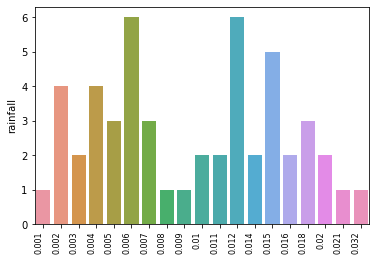

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt

# mengambil data Suhu yang tidak kosong
df_clean = df.dropna(subset=['rainfall'])

# membuat plot bar
ax = sns.barplot(x=df_clean["rainfall"].value_counts().index, y=df_clean["rainfall"].value_counts())

# menambahkan jarak antara label pada sumbu x
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=8)

# menampilkan plot
plt.show()


In [9]:

#untuk mengecek tipe data
print(df['Date'].dtype)
print(df['dewpoint'].dtype)
print(df['temperature'].dtype)
print(df['rainfall'].dtype)


object
float64
float64
float64


In [10]:

#Code tersebut melakukan konversi kolom dalam dataframe (df) menjadi tipe data numerik 
df['dewpoint'] = pd.to_numeric(df['dewpoint'], errors='coerce')
df['temperature'] = pd.to_numeric(df['temperature'], errors='coerce')
df['rainfall'] = pd.to_numeric(df['rainfall'], errors='coerce')
     

PREDIKSI MENGGUNAKAN METODE SUPPORT VECTOR REGRESSION

 # Melakukan Prediksi Curah Hujan Menggunakan Metode SVR Kernel RBF

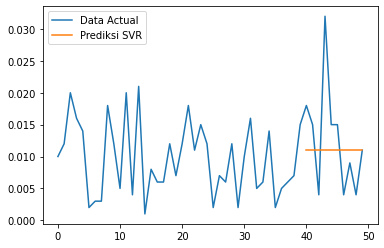

MAE:  0.0063
MAPE:  73.17361111111113
MSE:  6.89e-05
RMSE:  0.008300602387778853
Hasil Prediksi SVR:  [0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011]
Upper Bound:  [0.01671081 0.01671081 0.01671081 0.01671081 0.01671081 0.01671081
 0.01671081 0.01671081 0.01671081 0.01671081]
Lower Bound:  [0.00528919 0.00528919 0.00528919 0.00528919 0.00528919 0.00528919
 0.00528919 0.00528919 0.00528919 0.00528919]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom curah hujan
df['rainfall'] = df['rainfall'].str.replace(',', '.').astype(float)

# Mengambil 50 data pertama
data = df['rainfall'].values[:50]

# Membagi data menjadi data latih dan data uji
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Membuat model SVR dengan kernel RBF dan hyperparameter C=1 dan gamma=0.1
model = SVR(kernel='rbf', C=1, gamma=0.1)

# Melatih model dengan data latih
model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data)

# Memprediksi data uji
prediksi = model.predict(np.arange(len(train_data), len(data)).reshape(-1, 1))

# Menampilkan data Actual dan hasil prediksi
plt.plot(data, label='Data Actual')
plt.plot(range(train_size, len(data)), prediksi, label='Prediksi SVR')
plt.legend()
plt.show()

# Evaluasi model dengan menghitung MSE, RMSE, MAE, dan MAPE
mae = np.mean(np.abs(test_data - prediksi))
mape = np.mean(np.abs((test_data - prediksi) / test_data)) * 100
mse = mean_squared_error(test_data, prediksi)
rmse = np.sqrt(mse)

# Menampilkan hasil evaluasi
print("MAE: ", mae)
print("MAPE: ", mape)
print("MSE: ", mse)
print("RMSE: ", rmse)

# Mencari Upper Bound (UB) dan Lower Bound (LB)
n = len(test_data)
s = np.sqrt(np.sum((test_data - prediksi) ** 2) / (n - 1))
t = 2.064 # tabel distribusi t untuk derajat kebebasan n-2 dan α/2=0.025
ub = prediksi + t * s / np.sqrt(n)
lb = prediksi - t * s / np.sqrt(n)

# Menampilkan UB dan LB
print("Hasil Prediksi SVR: ", prediksi)
print("Upper Bound: ", ub)
print("Lower Bound: ", lb)


# Prediksi Hari Berikutnya

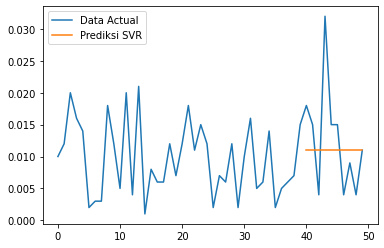

Data ke-51 (20/02/2017) adalah  0.006
Hasil prediksi data ke-51 adalah  0.011000000000000003


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom curah hujan
df['rainfall'] = df['rainfall'].str.replace(',', '.').astype(float)

# Mengambil 50 data pertama
data = df['rainfall'].values[:50]

# Membagi data menjadi data latih dan data uji
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Membuat model SVR dengan kernel RBF dan hyperparameter C=1 dan gamma=0.1
model = SVR(kernel='rbf', C=1, gamma=0.1)

# Melatih model dengan data latih
model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data)

# Memprediksi data uji
prediksi = model.predict(np.arange(len(train_data), len(data)).reshape(-1, 1))

# Menampilkan data Actual dan hasil prediksi
plt.plot(data, label='Data Actual')
plt.plot(range(train_size, len(data)), prediksi, label='Prediksi SVR')
plt.legend()
plt.show()

# Memprediksi data ke-51
data_51 = df['rainfall'].values[50]
prediksi_51 = model.predict(np.array([[len(data)]]))

# Menampilkan hasil prediksi data ke-51
print("Data ke-51 (20/02/2017) adalah ", data_51)
print("Hasil prediksi data ke-51 adalah ", prediksi_51[0])


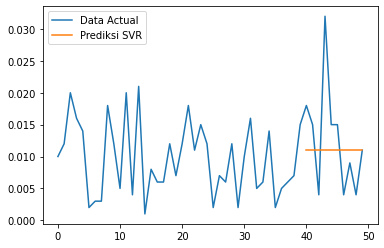

Data ke-51 (20/02/2017) adalah  0.006
Hasil prediksi data ke-51 adalah  0.011000000000000003
MSE:  6.89e-05
RMSE:  0.008300602387778853
MAE:  0.0063
MAPE:  73.17361111111113
Lower Bound:  0.002324650093512081
Upper Bound:  0.019675349906487925


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Import library untuk menghitung MAPE
from sklearn.utils import check_array
from sklearn.metrics import mean_absolute_error

from sklearn.svm import SVR

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom curah hujan
df['rainfall'] = df['rainfall'].str.replace(',', '.').astype(float)

# Mengambil 50 data pertama
data = df['rainfall'].values[:50]

# Membagi data menjadi data latih dan data uji
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Membuat model SVR dengan kernel RBF dan hyperparameter C=1 dan gamma=0.1
model = SVR(kernel='rbf', C=1, gamma=0.1)

# Melatih model dengan data latih
model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data)

# Memprediksi data uji
prediksi = model.predict(np.arange(len(train_data), len(data)).reshape(-1, 1))

# Menampilkan data Actual dan hasil prediksi
plt.plot(data, label='Data Actual')
plt.plot(range(train_size, len(data)), prediksi, label='Prediksi SVR')
plt.legend()
plt.show()

# Memprediksi data ke-51
data_51 = df['rainfall'].values[50]
prediksi_51 = model.predict(np.array([[len(data)]]))

# Menghitung MSE, RMSE, MAE, dan MAPE
mse = mean_squared_error(test_data, prediksi)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, prediksi)
mape = np.mean(np.abs((test_data - prediksi) / test_data)) * 100

# Menghitung Lower Bound dan Upper Bound
n = len(train_data)
s = np.sqrt(np.sum((test_data - prediksi) ** 2) / (n - 1))
t = 2.064 # Mendapatkan nilai t dari tabel distribusi t dengan derajat kebebasan 39 dan tingkat kepercayaan 95%
lb = prediksi - t*s
ub = prediksi + t*s

# Menampilkan hasil prediksi data ke-51, MSE, RMSE, MAE, MAPE, LB, dan UB
print("Data ke-51 (20/02/2017) adalah ", data_51)
print("Hasil prediksi data ke-51 adalah ", prediksi_51[0])
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("MAPE: ", mape)
print("Lower Bound: ", lb[0])
print("Upper Bound: ", ub[0])


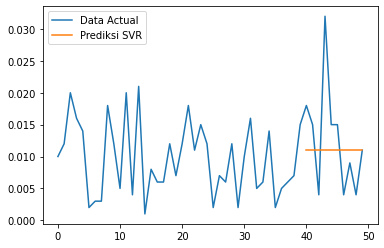

Data ke-52 adalah  nan
Hasil prediksi data ke-52 adalah  0.011000000000000003
MSE:  6.89e-05
RMSE:  0.008300602387778853
MAE:  0.0063
MAPE:  73.17361111111113
Lower Bound:  0.002324650093512081
Upper Bound:  0.019675349906487925


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Import library untuk menghitung MAPE
from sklearn.utils import check_array
from sklearn.metrics import mean_absolute_error

from sklearn.svm import SVR

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom curah hujan
df['rainfall'] = df['rainfall'].str.replace(',', '.').astype(float)

# Mengambil 50 data pertama
data = df['rainfall'].values[:50]

# Membagi data menjadi data latih dan data uji
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Membuat model SVR dengan kernel RBF dan hyperparameter C=1 dan gamma=0.1
model = SVR(kernel='rbf', C=1, gamma=0.1)

# Melatih model dengan data latih
model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data)

# Memprediksi data uji
prediksi = model.predict(np.arange(len(train_data), len(data)).reshape(-1, 1))

# Menampilkan data Actual dan hasil prediksi
plt.plot(data, label='Data Actual')
plt.plot(range(train_size, len(data)), prediksi, label='Prediksi SVR')
plt.legend()
plt.show()

# Memprediksi data ke-52
data_52 = df['rainfall'].values[51]
prediksi_52 = model.predict(np.array([[len(data) + 1]]))

# Menghitung MSE, RMSE, MAE, dan MAPE
mse = mean_squared_error(test_data, prediksi)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, prediksi)
mape = np.mean(np.abs((test_data - prediksi) / test_data)) * 100

# Menghitung Lower Bound dan Upper Bound
n = len(train_data)
s = np.sqrt(np.sum((test_data - prediksi) ** 2) / (n - 1))
t = 2.064 # Mendapatkan nilai t dari tabel distribusi t dengan derajat kebebasan 39 dan tingkat kepercayaan 95%
lb = prediksi - t*s
ub = prediksi + t*s

# Menampilkan hasil prediksi data ke-52, MSE, RMSE, MAE, MAPE, LB, dan UB


print("Data ke-52 adalah ", data_52)
print("Hasil prediksi data ke-52 adalah ", prediksi_52[0])
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("MAPE: ", mape)
print("Lower Bound: ", lb[0])
print("Upper Bound: ", ub[0])


Prediksi untuk hari ke-41: 0.01 mm
Prediksi untuk hari ke-42: 0.01 mm
Prediksi untuk hari ke-43: 0.01 mm
Prediksi untuk hari ke-44: 0.01 mm
Prediksi untuk hari ke-45: 0.01 mm
Prediksi untuk hari ke-46: 0.01 mm
Prediksi untuk hari ke-47: 0.01 mm
Prediksi untuk hari ke-48: 0.01 mm
Prediksi untuk hari ke-49: 0.01 mm
Prediksi untuk hari ke-50: 0.01 mm
Prediksi untuk hari ke-51: 0.01 mm


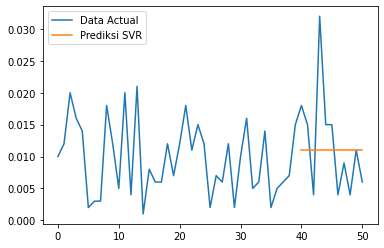

MAE:  0.006181818181818182
MAPE:  74.09722222222223
MSE:  6.490909090909091e-05
RMSE:  0.008056617833128919
Hasil Prediksi SVR:  [0.011000000000000003, 0.011000000000000003, 0.011000000000000003, 0.011000000000000003, 0.011000000000000003, 0.011000000000000003, 0.011000000000000003, 0.011000000000000003, 0.011000000000000003, 0.011000000000000003, 0.011000000000000003]
Upper Bound:  [0.01625851 0.01625851 0.01625851 0.01625851 0.01625851 0.01625851
 0.01625851 0.01625851 0.01625851 0.01625851 0.01625851]
Lower Bound:  [0.00574149 0.00574149 0.00574149 0.00574149 0.00574149 0.00574149
 0.00574149 0.00574149 0.00574149 0.00574149 0.00574149]


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom curah hujan
df['rainfall'] = df['rainfall'].str.replace(',', '.').astype(float)

# Mengambil 51 data pertama
data = df['rainfall'].values[:51]

# Membagi data menjadi data latih dan data uji
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Membuat model SVR dengan kernel RBF dan hyperparameter C=1 dan gamma=0.1
model = SVR(kernel='rbf', C=1, gamma=0.1)

# Melatih model dengan data latih
model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data)

# Memprediksi data uji
n_days_to_predict = len(data) - train_size
prediksi = []
for i in range(n_days_to_predict):
    day = i + train_size + 1  # untuk menghitung hari ke berapa
    prediksi_hari = model.predict(np.array([[train_size + i]]))[0]
    prediksi.append(prediksi_hari)
    print("Prediksi untuk hari ke-{}: {:.2f} mm".format(day, prediksi_hari))

# Menampilkan data Actual dan hasil prediksi
plt.plot(data, label='Data Actual')
plt.plot(range(train_size, len(data)), prediksi, label='Prediksi SVR')
plt.legend()
plt.show()

# Evaluasi model dengan menghitung MSE, RMSE, MAE, dan MAPE
mae = np.mean(np.abs(test_data - prediksi))
mape = np.mean(np.abs((test_data - prediksi) / test_data)) * 100
mse = mean_squared_error(test_data, prediksi)
rmse = np.sqrt(mse)

# Menampilkan hasil evaluasi
print("MAE: ", mae)
print("MAPE: ", mape)
print("MSE: ", mse)
print("RMSE: ", rmse)

# Mencari Upper Bound (UB) dan Lower Bound (LB)
n = len(test_data)
s = np.sqrt(np.sum((test_data - prediksi) ** 2) / (n - 1))
t = 2.064 # tabel distribusi t untuk derajat kebebasan n-2 dan α/2=0.025
ub = prediksi + t * s / np.sqrt(n)
lb = prediksi - t * s / np.sqrt(n)

# Menampilkan UB dan LB
print("Hasil Prediksi SVR: ", prediksi)
print("Upper Bound: ", ub)
print("Lower Bound: ", lb)


In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom curah hujan
df['dewpoint'] = df['dewpoint'].str.replace(',', '.').astype(float)
df['temperature'] = df['temperature'].str.replace(',', '.').astype(float)
df['rainfall'] = df['rainfall'].str.replace(',', '.').astype(float)

# Memisahkan data training dan data testing
X_train = df.iloc[:28, 1:3].values
y_train = df.iloc[:28, 3].values
X_test = df.iloc[28:29, 1:3].values
y_test = df.iloc[28:29, 3].values

# Membuat model SVR dengan kernel RBF
model = SVR(kernel='rbf', gamma='auto')

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)


# Menampilkan hasil prediksi
print("Prediksi curah hujan pada tanggal 19/02/2017:", y_pred[0])

# Menghitung beberapa metrik evaluasi
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

# Menampilkan metrik evaluasi
print("MAPE:", mape, "%")
print("MAE:", mae)
print("RMSE:", rmse)
print("MSE:", mse)

Prediksi curah hujan pada tanggal 19/02/2017: 0.011000000000000003
MAPE: 8.333333333333313 %
MAE: 0.0009999999999999974
RMSE: 0.0009999999999999974
MSE: 9.999999999999949e-07


In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("df_rainfall.csv", na_values=0, header=0, sep=';', names=['Date', 'dewpoint', 'temperature', 'rainfall'])

# Mengganti tanda koma menjadi titik pada kolom "rainfall"
df['rainfall'] = df['rainfall'].str.replace(',', '.').astype(float)

# Memisahkan data training dan data testing hanya untuk kolom "rainfall"
X_train = df.iloc[:28, 3:4].values
y_train = df.iloc[:28, 3].values
X_test = df.iloc[28:29, 3:4].values
y_test = df.iloc[28:29, 3].values

# Membuat model SVR dengan kernel RBF
model = SVR(kernel='rbf', gamma='auto')

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Menampilkan hasil prediksi
print("Prediksi rainfall pada tanggal 19/02/2017:", y_pred[0])

# Menghitung beberapa metrik evaluasi
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

# Menampilkan metrik evaluasi
print("MAPE:", mape, "%")
print("MAE:", mae)
print("RMSE:", rmse)
print("MSE:", mse)


Prediksi rainfall pada tanggal 19/02/2017: 0.011000000000000003
MAPE: 8.333333333333313 %
MAE: 0.0009999999999999974
RMSE: 0.0009999999999999974
MSE: 9.999999999999949e-07
